# Dataset Info
  author : Rasmus Rothe and Radu Timofte and Luc Van Gool
  
  title : Deep expectation of real and apparent age from a single image without facial landmarks
  
  journal : International Journal of Computer Vision (IJCV)
  
  year : 2016
  
  month : July

In [1]:
import os
import csv
import numpy as np
import pandas as pd

# read from current directory    
df_wiki = pd.read_csv(os.getcwd() + '\dataset\wiki_crop\wiki.csv', sep=",")
df_wiki = df_wiki.dropna(axis=0, how='any')
df_wiki.gender = df_wiki.gender.astype(int)
df_wiki.path = os.getcwd() + '/dataset/wiki_crop/' + df_wiki['path']
df_wiki

,path,age,gender
0,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,28,1
1,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,39,1
2,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,59,1
3,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,31,1
4,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,41,0
5,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,51,0
6,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,33,1
7,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,77,1
8,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,60,1
9,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,29,1


In [2]:
# remove records where age < 5 and > 100
df_wiki = df_wiki[(df_wiki.age >= 5) & (df_wiki.age <= 100)]
df_wiki

,path,age,gender
0,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,28,1
1,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,39,1
2,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,59,1
3,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,31,1
4,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,41,0
5,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,51,0
6,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,33,1
7,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,77,1
8,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,60,1
9,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,29,1


Populating the interactive namespace from numpy and matplotlib


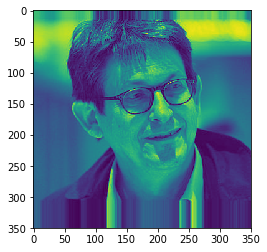

Age: 60 Gender: Male


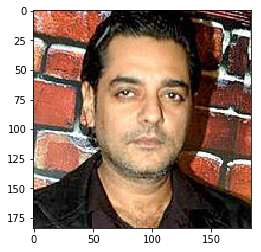

Age: 41 Gender: Male


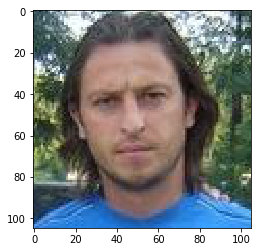

Age: 30 Gender: Male


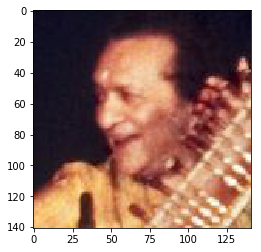

Age: 68 Gender: Male


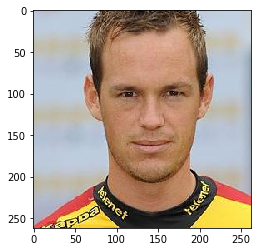

Age: 24 Gender: Male


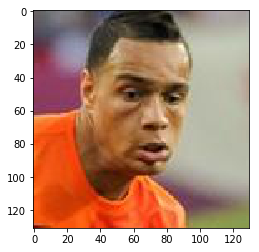

Age: 24 Gender: Male


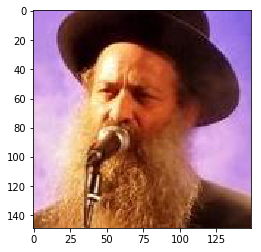

Age: 49 Gender: Male


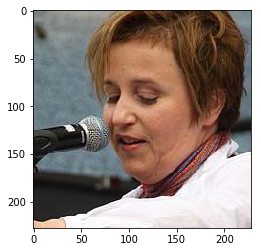

Age: 45 Gender: Female


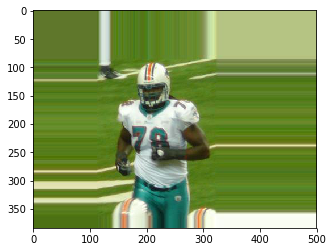

Age: 24 Gender: Male


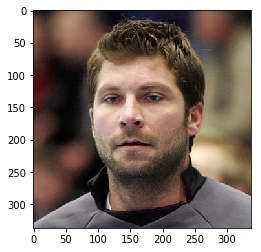

Age: 33 Gender: Male


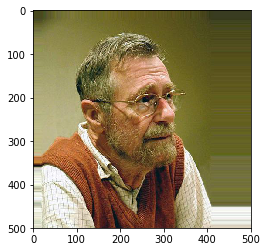

Age: 72 Gender: Male


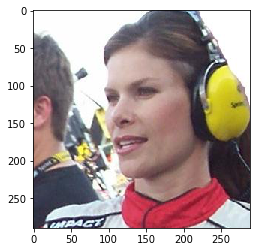

Age: 31 Gender: Female


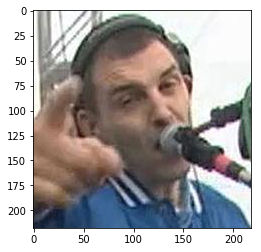

Age: 52 Gender: Male


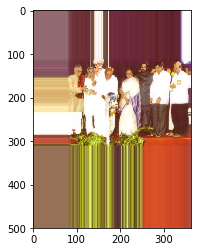

Age: 51 Gender: Male


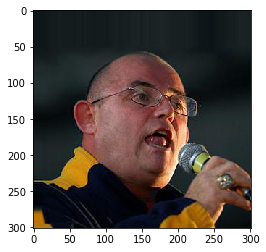

Age: 47 Gender: Male


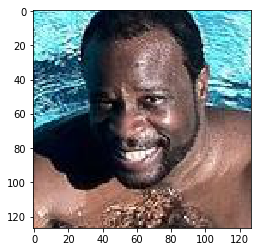

Age: 56 Gender: Male


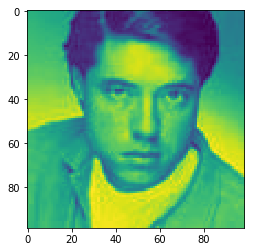

Age: 34 Gender: Male


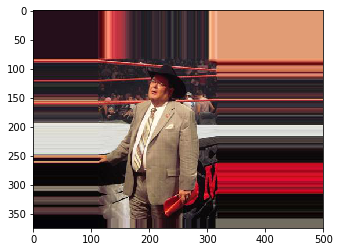

Age: 55 Gender: Male


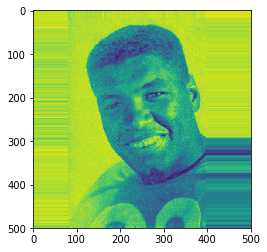

Age: 22 Gender: Male


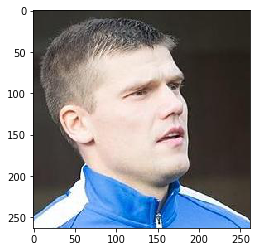

Age: 30 Gender: Male


In [3]:
%matplotlib notebook
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg    

# show some images, their age and gender
for i in range(30, 50):    
    test_img_wk = mpimg.imread(df_wiki['path'].iloc[i])
    imgplot = plt.imshow(test_img_wk)
    plt.show()
    if df_wiki['gender'].iloc[i] == 1:
        gender_wk = 'Male'
    else:
        gender_wk = 'Female'
    print('Age: ' + str(df_wiki['age'].iloc[i]), 'Gender: ' + gender_wk)

In [3]:
from PIL import Image

# dataframe with sizes
sizes = []
for i in range(0, len(df_wiki)):
    image=Image.open(df_wiki['path'].iloc[i])
    sizes.append({'Size':image.size})

sizes=pd.DataFrame(sizes)
sizes

,Size
0,"(257, 257)"
1,"(186, 186)"
2,"(457, 457)"
3,"(500, 347)"
4,"(173, 173)"
5,"(185, 185)"
6,"(214, 215)"
7,"(308, 308)"
8,"(1, 1)"
9,"(500, 372)"


In [4]:
# make indeces equal with our initial dataframe
sizes.index=df_wiki.index
sizes

,Size
0,"(257, 257)"
1,"(186, 186)"
2,"(457, 457)"
3,"(500, 347)"
4,"(173, 173)"
5,"(185, 185)"
6,"(214, 215)"
7,"(308, 308)"
8,"(1, 1)"
9,"(500, 372)"


In [5]:
# expand the tuples to 2 new columns x , y
sizes2=sizes
sizes2[['x', 'y']] = sizes2['Size'].apply(pd.Series)
sizes2

,Size,x,y
0,"(257, 257)",257,257
1,"(186, 186)",186,186
2,"(457, 457)",457,457
3,"(500, 347)",500,347
4,"(173, 173)",173,173
5,"(185, 185)",185,185
6,"(214, 215)",214,215
7,"(308, 308)",308,308
8,"(1, 1)",1,1
9,"(500, 372)",500,372


In [6]:
# plot to decide dimensions of resizing
import pylab
pylab.rcParams['figure.figsize'] = (250, 100)
sizes2['y'].value_counts().plot(kind='bar')
plt.xticks(rotation=70);

NameError: name 'plt' is not defined

In [6]:
# keep sizes only with x>200 , y>200 and x=y
sizes2=sizes2[(sizes2.x > 200) & (sizes2.y > 200) & (sizes2.x==sizes2.y)]
sizes2

,Size,x,y
0,"(257, 257)",257,257
2,"(457, 457)",457,457
7,"(308, 308)",308,308
10,"(346, 346)",346,346
11,"(228, 228)",228,228
15,"(457, 457)",457,457
17,"(301, 301)",301,301
19,"(227, 227)",227,227
20,"(294, 294)",294,294
24,"(211, 211)",211,211


In [7]:
# join sizes2 with df_wiki to keep the paths
sample=sizes2.join(df_wiki,how='inner')
sample

,Size,x,y,path,age,gender
0,"(257, 257)",257,257,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,28,1
2,"(457, 457)",457,457,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,59,1
7,"(308, 308)",308,308,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,77,1
10,"(346, 346)",346,346,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,41,1
11,"(228, 228)",228,228,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,36,1
15,"(457, 457)",457,457,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,25,0
17,"(301, 301)",301,301,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,36,1
19,"(227, 227)",227,227,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,77,1
20,"(294, 294)",294,294,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,51,1
24,"(211, 211)",211,211,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,28,0


In [8]:
sample.drop(['Size','x','y'], axis=1, inplace=True)
sample

,path,age,gender
0,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,28,1
2,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,59,1
7,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,77,1
10,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,41,1
11,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,36,1
15,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,25,0
17,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,36,1
19,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,77,1
20,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,51,1
24,C:\Users\manth\Desktop\AUEB\Spring Quarter\Soc...,28,0


In [47]:
# reshape some images for testing, with 50x50 size
for i in range(10,20):
    img = Image.open(sample['path'].iloc[i])
    img.thumbnail((50, 50), Image.ANTIALIAS) # resizes image in-place
    imgplot = plt.imshow(img)
    plt.show()
    print(img.size)

TypeError: 'builtin_function_or_method' object is not subscriptable

In [31]:
# --- cnn from now on ---
import tensorflow as tf

# each image will be represented by a 200x200 = 40000 flattened array
x = tf.placeholder(tf.float32, shape=[None, 40000], name="x")

In [32]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [33]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [34]:
# First CNN

# 32 features for all 5x5 image patches 
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [35]:
x_image = tf.reshape(x, [-1, 200, 200, 1])

In [36]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [37]:
# Second CNN
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [38]:
# Densely connected layer
W_fc1 = weight_variable([50 * 50 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 50*50*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [39]:
# Dropout
keep_prob = tf.placeholder(tf.float32, name="keep_prob")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [40]:
# Readout layer
W_fc2 = weight_variable([1024, 96])
b_fc2 = bias_variable([96])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [41]:
# batch size
b_size = 50
# iterations for training
training_iters = 10000
# epochs
training_epochs = 10

In [42]:
# target variable will classify in the range 0-96
y_ = tf.placeholder(tf.float32, shape=[None, 96], name="y_")

# Define loss(cross entropy) and optimizer(train step)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

# Evaluate the model
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [21]:
import PIL.ImageOps as ops

# routine for converting to np array, after resizing to 200x200
def get_numpy_wiki(fpath):   
    im_wiki = Image.open(fpath)
    # converty to grayscale
    im_wiki = im_wiki.convert('L')
    # resize to 200x200
    im_wiki = ops.fit(im_wiki, (200, 200), Image.ANTIALIAS)
    im_wiki = list(im_wiki.getdata())
    return  im_wiki

In [22]:
# create final array of all images
size = int(training_iters + (0.3 * training_iters))
images = np.array([ get_numpy_wiki(fpath) for fpath in df_wiki.path[:size] ], dtype=np.float32)  
images

array([[ 255.,  255.,  255., ...,   65.,   68.,   71.],
       [  42.,   51.,   76., ...,   73.,   71.,   76.],
       [  95.,   92.,   93., ...,   31.,   31.,   31.],
       ..., 
       [  12.,   12.,   12., ...,    4.,    4.,    4.],
       [ 194.,  194.,  194., ...,   82.,   82.,   82.],
       [  18.,   17.,   17., ...,  171.,  168.,  165.]], dtype=float32)

In [23]:
# create final array of ages
ages = np.empty([size, 96])
iter_ind = 0
for age in df_wiki.age[:size]:
    # create an empty array for each image of 97 positions 
    a = np.empty(96)
    b = np.arange(1, 97, 1)
    ind = np.arange(len(a))
    np.put(a, ind, b)
    # store 1 in the position of the age, 0 elsewhere
    a = np.where(a == age, 1., 0.)
    # store the array inside the structure
    ages[iter_ind] = a
    iter_ind += 1
ages

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [43]:
with tf.Session() as sess:
    print("Age Classification is going to take place")
    sess.run(tf.global_variables_initializer())
    # train
    for epoch in range(training_epochs):
        avg_cost = 0.
        avg_acc = 0.        
        step_train = 1
        # loop over all batches
        while step_train * b_size < training_iters:
            # choose elements belonging to current batch
            batch = images[(step_train - 1) * b_size : step_train * b_size] 
            age_batch = ages[(step_train - 1) * b_size : step_train * b_size]

            sess.run(train_step, feed_dict={x: batch, y_: age_batch, keep_prob: 0.5})
            # Calculate batch loss and accuracy
            loss, acc = sess.run([cross_entropy, accuracy], feed_dict={x: batch, y_: age_batch, keep_prob: 1.})            
        #print(
        #        "Iter " + str(step_train*b_size) +
        #        ", Minibatch Loss= " + "{:.6f}".format(loss) +
        #        ", Training Accuracy= " + "{:.5f}".format(acc) 
        #)
            # Calculate batch loss and accuracy
            avg_cost = (avg_cost + loss)
            avg_acc = (avg_acc + acc)
            
            step_train += 1   
    
       # test - 30% of records not included in the training set, are chosen here 
        #print("Starting iterating over test set...")
        sum = 0
        i = 0
        step = step_train
        while step * b_size < training_iters + (0.3 * training_iters):
        
            batch = images[(step - 1) * b_size : step * b_size] 
            age_batch = ages[(step - 1) * b_size : step * b_size]
         
            # Calculate accuracy for test images
            #t_acc = sess.run(accuracy, feed_dict={x: batch, y_: age_batch, keep_prob: 1.})
            t_acc = accuracy.eval(feed_dict={x: batch, y_: age_batch, keep_prob: 1.0})
            sum = sum + t_acc
            #print("Iter " + str(i*b_size) + ", Testing Accuracy= " + "{:.5f}".format(t_acc))
            step += 1
            i += 1
        
        #print('Average accuracy on test set %g' % (sum/i))
        print(
                "Epoch:",
                '%04d' % (epoch+1),
                "cost=",
                "{:.9f}".format(avg_cost/step_train),
                "average_train_accuracy=",
                "{:.6f}".format(avg_acc/step_train),
                "average_test_accuracy=",
                "{:.6f}".format(sum/i)
        )
    print("Optimization Finished!") 

Age Classification is going to take place
Epoch: 0001 cost= 574.153847790 average_train_accuracy= 0.031300 average_test_accuracy= 0.037000
Epoch: 0002 cost= 10.912909322 average_train_accuracy= 0.036900 average_test_accuracy= 0.040333
Epoch: 0003 cost= 6.520114284 average_train_accuracy= 0.043200 average_test_accuracy= 0.043333
Epoch: 0004 cost= 5.414059920 average_train_accuracy= 0.045500 average_test_accuracy= 0.043000
Epoch: 0005 cost= 4.888906698 average_train_accuracy= 0.046800 average_test_accuracy= 0.043667
Epoch: 0006 cost= 4.665815687 average_train_accuracy= 0.048300 average_test_accuracy= 0.044333
Epoch: 0007 cost= 4.576030850 average_train_accuracy= 0.048700 average_test_accuracy= 0.044333
Epoch: 0008 cost= 4.528760893 average_train_accuracy= 0.049300 average_test_accuracy= 0.044333
Epoch: 0009 cost= 4.503653646 average_train_accuracy= 0.049400 average_test_accuracy= 0.043333
Epoch: 0010 cost= 4.479047990 average_train_accuracy= 0.047700 average_test_accuracy= 0.043333
Optim

In [25]:
# layers for gender classification

W_fc2_gender = weight_variable([1024, 2])
b_fc2_gender = bias_variable([2])

y_conv_gender = tf.matmul(h_fc1_drop, W_fc2_gender) + b_fc2_gender

# target variable will classify in the range 1/2
y_ = tf.placeholder(tf.float32, shape=[None, 2])

# Define loss(cross entropy) and optimizer(train step)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv_gender))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

# Evaluate the model
correct_prediction = tf.equal(tf.argmax(y_conv_gender, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [26]:
# create final array of genders
genders = np.empty([size, 2])
iter_ind = 0
for gender in df_wiki.gender[:size]:
    # create an empty array for each image  
    a = np.empty(2)
    if gender == 0: #female
        a[0] = 1
        a[1] = 0 
    else:
        a[0] = 0
        a[1] = 1
    # store the array inside the structure
    genders[iter_ind] = a
    iter_ind += 1
    
genders[:15]

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.]])

In [30]:
with tf.Session() as sess:
    print("Gender Classification is going to take place")
    sess.run(tf.global_variables_initializer())
    # train
    for epoch in range(training_epochs):
        avg_cost = 0.
        avg_acc = 0.        
        step_train = 1
        # loop over all batches
        while step_train * b_size < training_iters:
            # choose elements belonging to current batch
            batch = images[(step_train - 1) * b_size : step_train * b_size] 
            gender_batch = genders[(step_train - 1) * b_size : step_train * b_size]

            sess.run(train_step, feed_dict={x: batch, y_: gender_batch, keep_prob: 0.5})
            # Calculate batch loss and accuracy
            loss, acc = sess.run([cross_entropy, accuracy], feed_dict={x: batch, y_: gender_batch, keep_prob: 1.})            
        #print(
        #        "Iter " + str(step_train*b_size) +
        #        ", Minibatch Loss= " + "{:.6f}".format(loss) +
        #        ", Training Accuracy= " + "{:.5f}".format(acc) 
        #)
            # Calculate batch loss and accuracy
            avg_cost = (avg_cost + loss)
            avg_acc = (avg_acc + acc)
            
            step_train += 1  
        
    
       # test - 30% of records not included in the training set, are chosen here 
        #print("Starting iterating over test set...")
        step = step_train
        sum = 0
        i = 0
        while step * b_size < training_iters + (0.3 * training_iters):
        
            batch = images[(step - 1) * b_size : step * b_size] 
            gender_batch = genders[(step - 1) * b_size : step * b_size]
         
            # Calculate accuracy for test images
            #t_acc = sess.run(accuracy, feed_dict={x: batch, y_: gender_batch, keep_prob: 1.})
            t_acc = accuracy.eval(feed_dict={x: batch, y_: gender_batch, keep_prob: 1.0})
            sum = sum + t_acc
            #print("Iter " + str(i*b_size) + ", Testing Accuracy= " + "{:.5f}".format(t_acc))
            step += 1
            i += 1
        
        #print('Average accuracy on test set %g' % (sum/i))
        print(
                "Epoch:",
                '%04d' % (epoch+1),
                "cost=",
                "{:.9f}".format(avg_cost/step_train),
                "average_train_accuracy=",
                "{:.6f}".format(avg_acc/step_train),
                "average_test_accuracy=",
                "{:.6f}".format(sum/i)
        )
    print("Optimization Finished!")         

Gender Classification is going to take place
Epoch: 0001 cost= 381.092559969 average_train_accuracy= 0.748000 average_test_accuracy= 0.753333
Epoch: 0002 cost= 32.632014910 average_train_accuracy= 0.793100 average_test_accuracy= 0.722333
Epoch: 0003 cost= 6.617547771 average_train_accuracy= 0.798300 average_test_accuracy= 0.742333
Epoch: 0004 cost= 2.130837729 average_train_accuracy= 0.800900 average_test_accuracy= 0.770667
Epoch: 0005 cost= 1.196460270 average_train_accuracy= 0.804700 average_test_accuracy= 0.779000
Epoch: 0006 cost= 0.743224331 average_train_accuracy= 0.805800 average_test_accuracy= 0.779667
Epoch: 0007 cost= 0.573333067 average_train_accuracy= 0.810700 average_test_accuracy= 0.791333
Epoch: 0008 cost= 0.507134202 average_train_accuracy= 0.810700 average_test_accuracy= 0.790000
Epoch: 0009 cost= 0.493965659 average_train_accuracy= 0.810100 average_test_accuracy= 0.793000
Epoch: 0010 cost= 0.463266723 average_train_accuracy= 0.810600 average_test_accuracy= 0.793667
Op